no blank data block
Buy-and-Hold Strategy Results:
Buy Date: 2017-07-03, Buy Price: 25524.0
Sell Date: 2020-06-09, Sell Price: 24867.0
Price Difference: -657.00
Profit Rate: -2.57%


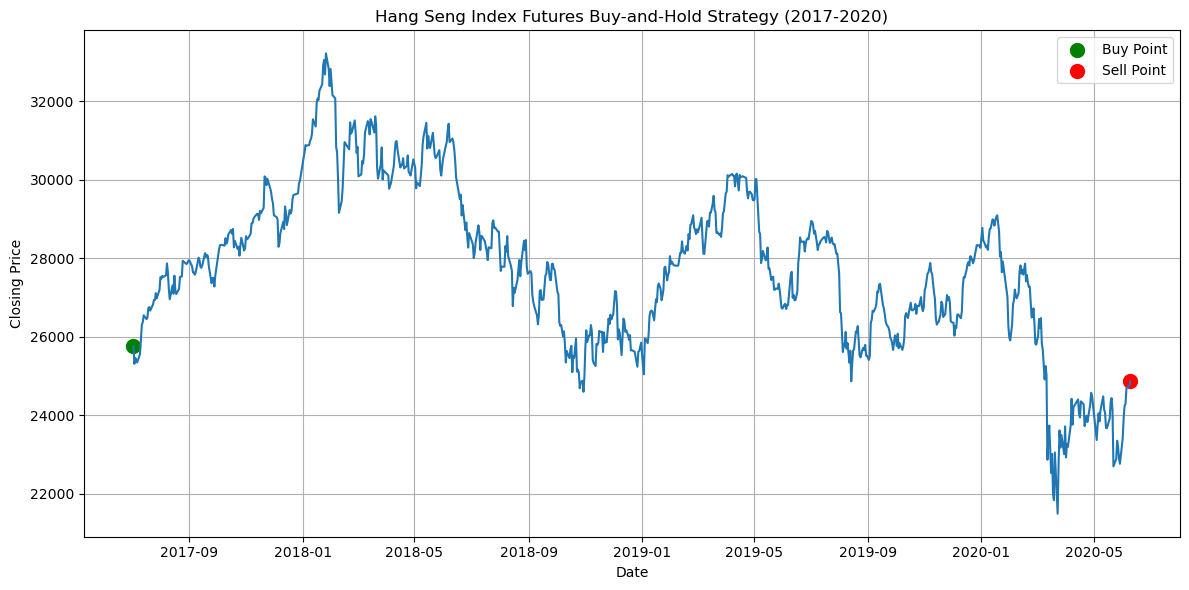

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Data loading and preprocessing
def preprocess_data(file_path):
    # Read data
    df = pd.read_csv(file_path)
    
    # Check for missing values
    if df.isnull().sum().sum() > 0:
        print("Missing data found, preparing to fill...")
        
        # Iterate through each column
        for column in df.columns:
            # Check if the column has missing values
            if df[column].isnull().sum() > 0:
                print(f"Column {column} has {df[column].isnull().sum()} missing values")
                
                # Fill with the average of the nearest non-null values before and after
                # Get indices of missing values
                null_indices = df[df[column].isnull()].index.tolist()
                
                for idx in null_indices:
                    # Find the nearest previous non-null value index
                    prev_idx = idx - 1
                    while prev_idx >= 0 and pd.isnull(df.at[prev_idx, column]):
                        prev_idx -= 1
                    
                    # Find the nearest next non-null value index
                    next_idx = idx + 1
                    while next_idx < len(df) and pd.isnull(df.at[next_idx, column]):
                        next_idx += 1
                    
                    # Calculate average and fill
                    if prev_idx >= 0 and next_idx < len(df):
                        # If both before and after values exist, take the average
                        avg_value = (df.at[prev_idx, column] + df.at[next_idx, column]) / 2
                        df.at[idx, column] = avg_value
                    elif prev_idx >= 0:
                        # If only previous value exists, use it
                        df.at[idx, column] = df.at[prev_idx, column]
                    elif next_idx < len(df):
                        # If only next value exists, use it
                        df.at[idx, column] = df.at[next_idx, column]
        
        print("Missing data filling completed")
    else:
        print("no blank data block")
    
    # Merge date and time columns into datetime type
    df['datetime'] = pd.to_datetime(df['date'].astype(str) + df['time'].astype(str).str.zfill(6), format='%Y%m%d%H%M%S')
    
    return df

# 2. BAH strategy implementation
def bah_strategy(df):
    # Ensure sorted by datetime
    df = df.sort_values('datetime')
    
    # Get the closing price of the first minute of the first day as the buy price
    first_day = df['date'].iloc[0]
    buy_price = df[df['date'] == first_day]['hi1_close'].iloc[0]
    
    # Get the closing price of the last minute of the last day as the sell price
    last_day = df['date'].iloc[-1]
    sell_price = df[df['date'] == last_day]['hi1_close'].iloc[-1]
    
    # Calculate strategy results
    profit = sell_price - buy_price
    profit_rate = (sell_price / buy_price - 1) * 100
    
    print(f"Buy-and-Hold Strategy Results:")
    print(f"Buy Date: {pd.to_datetime(str(first_day), format='%Y%m%d').strftime('%Y-%m-%d')}, Buy Price: {buy_price}")
    print(f"Sell Date: {pd.to_datetime(str(last_day), format='%Y%m%d').strftime('%Y-%m-%d')}, Sell Price: {sell_price}")
    print(f"Price Difference: {profit:.2f}")
    print(f"Profit Rate: {profit_rate:.2f}%")
    
    # Visualize strategy
    plot_bah_strategy(df)
    
    return {
        'buy_price': buy_price,
        'sell_price': sell_price,
        'profit': profit,
        'profit_rate': profit_rate
    }

# 3. Strategy visualization
def plot_bah_strategy(df):
    # Create dataframe with daily closing prices
    daily_close = df.groupby('date')['hi1_close'].last().reset_index()
    daily_close['date'] = pd.to_datetime(daily_close['date'], format='%Y%m%d')
    
    # Plot closing price trend
    plt.figure(figsize=(12, 6))
    plt.plot(daily_close['date'], daily_close['hi1_close'])
    
    # Mark buy and sell points
    plt.scatter(daily_close['date'].iloc[0], daily_close['hi1_close'].iloc[0], color='green', s=100, label='Buy Point')
    plt.scatter(daily_close['date'].iloc[-1], daily_close['hi1_close'].iloc[-1], color='red', s=100, label='Sell Point')
    
    plt.title('Hang Seng Index Futures Buy-and-Hold Strategy (2017-2020)')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig('bah_strategy.png')
    plt.show()

# Main function
def main():
    file_path = 'hi1_20170701_20200609.csv'
    
    # Data preprocessing
    df = preprocess_data(file_path)
    
    # Apply BAH strategy
    bah_results = bah_strategy(df)
    
    return df, bah_results

if __name__ == "__main__":
    df, bah_results = main()


no blank data block
Buy-and-Hold 策略结果:
买入日期: 2017-07-03, 买入价格: 25524.0
卖出日期: 2020-06-09, 卖出价格: 24867.0
价格差: -657.00
利润率: -2.57%
Using font: SimHei


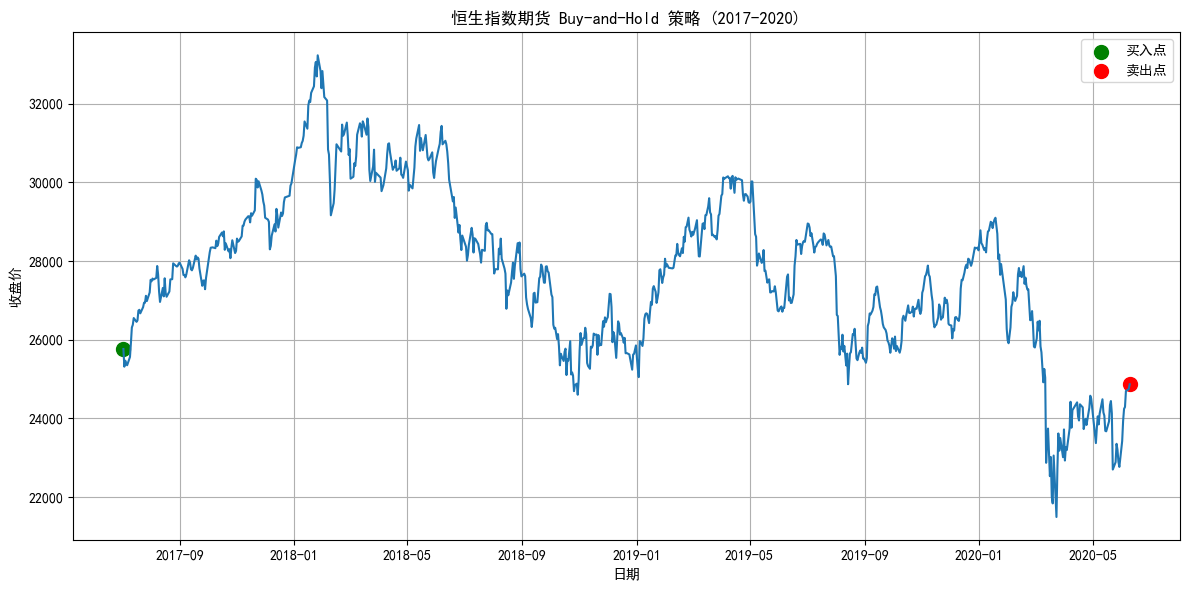

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import FontProperties

# 配置中文字体支持
def setup_chinese_font():
    try:
        # 方法1: 使用系统中已有的中文字体
        # 常见的中文字体选项
        chinese_fonts = ['SimHei', 'Microsoft YaHei', 'SimSun', 'KaiTi', 'FangSong', 
                         'STHeiti', 'STKaiti', 'STSong', 'STFangsong', 'PingFang SC',
                         'Noto Sans CJK SC', 'Noto Sans SC', 'Source Han Sans CN', 
                         'WenQuanYi Micro Hei', 'WenQuanYi Zen Hei']
        
        # 尝试找到系统中存在的中文字体
        font_found = False
        for font in chinese_fonts:
            try:
                test_font = FontProperties(family=font)
                if test_font.get_name() != 'DejaVu Sans':  # 如果不是默认字体
                    plt.rcParams['font.family'] = font
                    print(f"Using font: {font}")
                    font_found = True
                    break
            except:
                continue
        
        if not font_found:
            # 方法2: 如果没有找到合适的中文字体，使用matplotlib内置的支持
            plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
            plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号
            print("Using default SimHei font setting")
    
    except Exception as e:
        print(f"Warning: Failed to set Chinese font. Error: {e}")
        print("Falling back to English labels")
        return False
    
    return True

# 1. Data loading and preprocessing
def preprocess_data(file_path):
    # Read data
    df = pd.read_csv(file_path)
    
    # Check for missing values
    if df.isnull().sum().sum() > 0:
        print("发现缺失数据，准备进行填充...")
        
        # Iterate through each column
        for column in df.columns:
            # Check if the column has missing values
            if df[column].isnull().sum() > 0:
                print(f"列 {column} 有 {df[column].isnull().sum()} 个缺失值")
                
                # Fill with the average of the nearest non-null values before and after
                null_indices = df[df[column].isnull()].index.tolist()
                
                for idx in null_indices:
                    # Find the nearest previous non-null value index
                    prev_idx = idx - 1
                    while prev_idx >= 0 and pd.isnull(df.at[prev_idx, column]):
                        prev_idx -= 1
                    
                    # Find the nearest next non-null value index
                    next_idx = idx + 1
                    while next_idx < len(df) and pd.isnull(df.at[next_idx, column]):
                        next_idx += 1
                    
                    # Calculate average and fill
                    if prev_idx >= 0 and next_idx < len(df):
                        avg_value = (df.at[prev_idx, column] + df.at[next_idx, column]) / 2
                        df.at[idx, column] = avg_value
                    elif prev_idx >= 0:
                        df.at[idx, column] = df.at[prev_idx, column]
                    elif next_idx < len(df):
                        df.at[idx, column] = df.at[next_idx, column]
        
        print("缺失数据填充完成")
    else:
        print("no blank data block")
    
    # Merge date and time columns into datetime type
    df['datetime'] = pd.to_datetime(df['date'].astype(str) + df['time'].astype(str).str.zfill(6), format='%Y%m%d%H%M%S')
    
    return df

# 2. BAH strategy implementation
def bah_strategy(df):
    # Ensure sorted by datetime
    df = df.sort_values('datetime')
    
    # Get the closing price of the first minute of the first day as the buy price
    first_day = df['date'].iloc[0]
    buy_price = df[df['date'] == first_day]['hi1_close'].iloc[0]
    
    # Get the closing price of the last minute of the last day as the sell price
    last_day = df['date'].iloc[-1]
    sell_price = df[df['date'] == last_day]['hi1_close'].iloc[-1]
    
    # Calculate strategy results
    profit = sell_price - buy_price
    profit_rate = (sell_price / buy_price - 1) * 100
    
    print(f"Buy-and-Hold 策略结果:")
    print(f"买入日期: {pd.to_datetime(str(first_day), format='%Y%m%d').strftime('%Y-%m-%d')}, 买入价格: {buy_price}")
    print(f"卖出日期: {pd.to_datetime(str(last_day), format='%Y%m%d').strftime('%Y-%m-%d')}, 卖出价格: {sell_price}")
    print(f"价格差: {profit:.2f}")
    print(f"利润率: {profit_rate:.2f}%")
    
    # Visualize strategy
    plot_bah_strategy(df)
    
    return {
        'buy_price': buy_price,
        'sell_price': sell_price,
        'profit': profit,
        'profit_rate': profit_rate
    }

# 3. Strategy visualization
def plot_bah_strategy(df):
    # Create dataframe with daily closing prices
    daily_close = df.groupby('date')['hi1_close'].last().reset_index()
    daily_close['date'] = pd.to_datetime(daily_close['date'], format='%Y%m%d')
    
    # Check if Chinese font is available
    chinese_font_available = setup_chinese_font()
    
    # Plot closing price trend
    plt.figure(figsize=(12, 6))
    plt.plot(daily_close['date'], daily_close['hi1_close'])
    
    # Mark buy and sell points
    if chinese_font_available:
        plt.scatter(daily_close['date'].iloc[0], daily_close['hi1_close'].iloc[0], color='green', s=100, label='买入点')
        plt.scatter(daily_close['date'].iloc[-1], daily_close['hi1_close'].iloc[-1], color='red', s=100, label='卖出点')
        
        plt.title('恒生指数期货 Buy-and-Hold 策略 (2017-2020)')
        plt.xlabel('日期')
        plt.ylabel('收盘价')
    else:
        plt.scatter(daily_close['date'].iloc[0], daily_close['hi1_close'].iloc[0], color='green', s=100, label='Buy Point')
        plt.scatter(daily_close['date'].iloc[-1], daily_close['hi1_close'].iloc[-1], color='red', s=100, label='Sell Point')
        
        plt.title('Hang Seng Index Futures Buy-and-Hold Strategy (2017-2020)')
        plt.xlabel('Date')
        plt.ylabel('Closing Price')
    
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig('bah_strategy.png')
    plt.show()

# Main function
def main():
    file_path = 'hi1_20170701_20200609.csv'
    
    # Data preprocessing
    df = preprocess_data(file_path)
    
    # Apply BAH strategy
    bah_results = bah_strategy(df)
    
    return df, bah_results

if __name__ == "__main__":
    df, bah_results = main()
